## Author: Nikki Mittal

## Data Science and Business Analytics Intern


## The Sparks Foundation

### GRIP DECEMBER 2022

## Task 1: Prediction using Supervised ML

### Prediction of the scores secured by a student based on the number of hours he/she studies per day.

The dataset contains details of the number of hours a student studies and how much scores he/she secured. The goal is to build a Machine Learning Model to predict the score if the student studies for 9.25 hours/day.

This is a simple Linear Regression Model in which the score is the dependent variable and number of hours is the independent variable.

### Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings(action= 'ignore')

### Loading the dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print(data.shape)                 
data.head(5)                       

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The dataset contains 25 rows and 2 columns. The dataset contains the details of the number of hours a student studies and the scores secured.

### Exploring the dataset

In [3]:
#for statistical description of data

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The dataset seems outliers free based on the values of mean and standard deviation but it is needed to check whether there are any outliers or not.

In [4]:
#More information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Clearly, there are no null values in the dataset.

### Data Cleaning

Hours     0
Scores    0
dtype: int64


<AxesSubplot:>

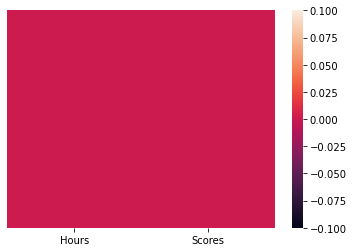

In [5]:
#Confirming if there are any null values

nullvalues_check = data.isnull().sum() 
print(nullvalues_check)

sns.heatmap(data.isnull(), yticklabels = False)

It is confirmed that the dataset has no null values.

In [6]:
#Checking if there is any duplicate value:

data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

Clearly, there are no duplicate values in the dataset.

<AxesSubplot:>

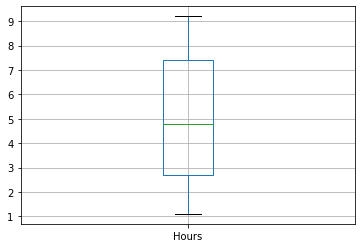

In [7]:
#Outliers Detection

data[['Hours']].boxplot()

There are no outliers in the Hours column.

<AxesSubplot:>

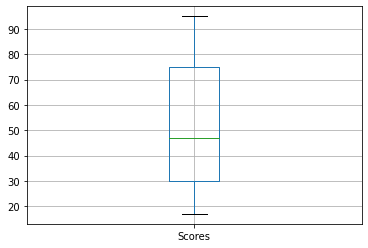

In [8]:
data[['Scores']].boxplot()

There are no outliers in the Scores column. The dataset is outliers - free. The dataset can now be visualized and analyzed.

### Visualization of the dataset

#### Univariate Analysis

Text(0.5, 1.0, 'Distribution of Study Hours')

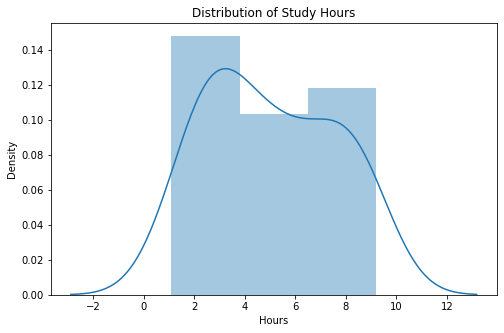

In [9]:
#Distribution of the Hours column:

plt.figure(figsize = (8,5))
sns.distplot(data.Hours)
plt.title("Distribution of Study Hours")

The hours of the student lie between the range of 1 to 10. The distribution seems slightly rightly skewed.

In [10]:
#Skewness of Hours column values

data.Hours.skew()

0.1903382010052985

The distribution of the hours is slightly rightly skewed. 

Text(0.5, 1.0, 'Distribution of Scores')

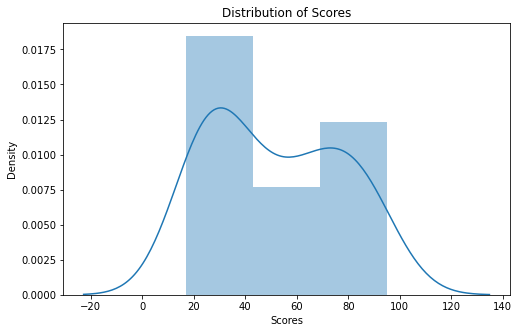

In [11]:
#Distribution of the Scores column:

plt.figure(figsize = (8,5))
sns.distplot(data.Scores)
plt.title("Distribution of Scores")

The scores lie between the range of 10 to 100. The distribution seems slightly rightly skewed.

In [12]:
#Skewness of Scores column values

data.Scores.skew()

0.2339646665397317

The distribution of the scores is also slightly right skewed.

#### Bivariate Analysis

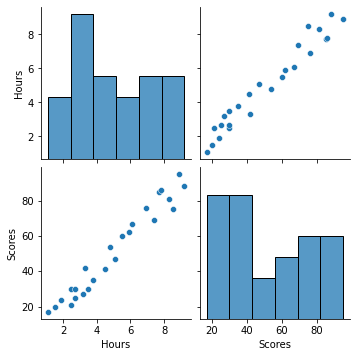

In [13]:
#Pairplot
sns.pairplot(data, diag_kind = 'hist', vars = ['Hours', 'Scores'])

The pairplot shows that with increase in number of hours, the scores also increase in most of the cases.

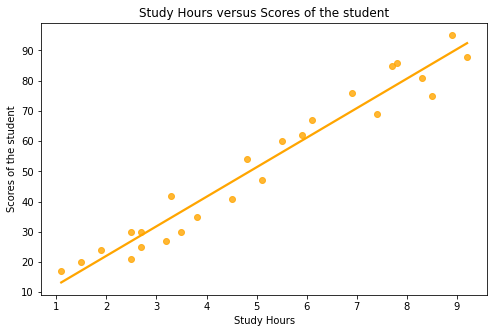

In [14]:
#Regression Plot

plt.figure(figsize = (8, 5))
sns.regplot(x = data['Hours'], y = data['Scores'], color = "Orange", ci = None)
plt.xlabel("Study Hours")
plt.ylabel("Scores of the student")
plt.title("Study Hours versus Scores of the student")

plt.show()

A linear relation is there between the study hours and the scores obtained.

<AxesSubplot:>

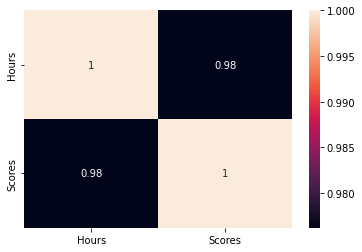

In [15]:
#Correlation Plot

sns.heatmap(data.corr(), annot=True)

The hours and scores are highly correlated with a correlation coefficient of 0.98. This means that if the student increases his/her number of hours of study, there are high chances that his/her scores will also increase accordingly.

### Building Machine Learning Model 

#### Linear Regression Model to predict the scores based on 9.25 hours/day study

In [16]:
#Importing required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [17]:
#Defining x and y values:

x = data[['Hours']].values
y = data['Scores'].values

In [18]:
#Splitting the data into training and testing datasets (80% training data and 20% testing data):

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

#### Defining and fitting the Linear Regression Model

In [19]:
#Training the model to predict the scores:

LR_Model = LinearRegression().fit(x_train, y_train)
print(LR_Model)

LinearRegression()


In [20]:
#Prediction from the model
y_pred = LR_Model.predict(x_test)                    

In [21]:
#Slope/Coefficient and intercepts of the model

print('Slope or Coefficient:', LR_Model.coef_)
print('Intercept:', LR_Model.intercept_)

Slope or Coefficient: [9.91065648]
Intercept: 2.018160041434683


In [22]:
print('The equation of regression line is: Scores =', LR_Model.coef_ , '* Study Hours +',  LR_Model.intercept_ )

The equation of regression line is: Scores = [9.91065648] * Study Hours + 2.018160041434683


### Evaluating the model

In [23]:
#Calculating the important metrics

print('R2 Score is:', round(r2_score(y_test, y_pred), 2))
print('Root Mean Squared Error is:', round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print('Mean Absolute Error is:', round(mean_absolute_error(y_test, y_pred), 2))


R2 Score is: 0.95
Root Mean Squared Error is: 4.65
Mean Absolute Error is: 4.18


R2 Score is approximate 0.95 which indicates that the model is good in predicting the scores. 

Root Mean Squared Error measures how well the regression line fits the data points. The low RMSE value indicates that the predicted and observed Scores are close to each other indicating a good accuracy. 

Mean Absolute Error of 4.18 tells that we can expect an average error of 4.18 from the predictions or the average difference between the predicted values and actual values is 4.18.



In [24]:
#Comparison of actual and predicted value

data1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': y_test - y_pred})
data1.head()

,Actual,Predicted,Error
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


It can be clearly seen that there is not much variation in the predicted values and the actual values.

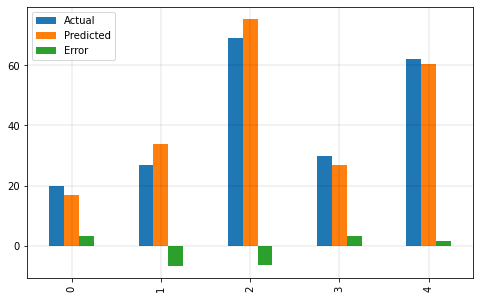

In [25]:
data1.plot(kind = 'bar',figsize = (8,5))
plt.grid(which = 'major', linestyle ='-', linewidth='0.1', color = 'black')
plt.show()

The very less variation in the predicted and actual values can be seen in the above plot.

### Prediction of scores when number of hours of study = 9.25 hours/day

In [26]:
Predicted_Score = LR_Model.predict([[9.25]])
print(Predicted_Score)

[93.69173249]


If number of study hours/day is 9.25, then the model predicts that the student will get an approximate score of 94.

### Conclusions

1. The student will score approximate 94 if he/she studies for 9.25 hours/day.
2. The model shows a good accuracy in predicting the scores.